In [2]:
import pandas
# Get the path to the CSV file
#csv_file_path = '/content/Vehicle_data.csv'
train=pandas.read_csv("train.csv")
print(train)

          id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0          1  2011-08-20       43     27.0    4.0        NaN       NaN   
1          2  2011-08-23       34     19.0    3.0        NaN       NaN   
2          3  2011-08-27       43     29.0    2.0        NaN       NaN   
3          4  2011-09-01       89     50.0    9.0        NaN       NaN   
4          5  2011-09-05       77     77.0    4.0        NaN       NaN   
...      ...         ...      ...      ...    ...        ...       ...   
30466  30469  2015-06-30       44     27.0    7.0        9.0       1.0   
30467  30470  2015-06-30       86     59.0    3.0        9.0       2.0   
30468  30471  2015-06-30       45      NaN   10.0       20.0       1.0   
30469  30472  2015-06-30       64     32.0    5.0       15.0       1.0   
30470  30473  2015-06-30       43     28.0    1.0        9.0       1.0   

       build_year  num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0             NaN       NaN       NaN

# Data understanding

Dataframe shape
Dtypes
Describe
Head and tail
coloumns


In [3]:
# Get the shape of the dataframe
shape = train.shape
# Print the shape of the dataframe
print(shape)

(30471, 292)


In [4]:
# Check the data types of the columns in the dataframe
print(train.dtypes)

id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [5]:
# Print the summary of the dataframe
print(train.describe())

                 id       full_sq       life_sq         floor     max_floor  \
count  30471.000000  30471.000000  24088.000000  30304.000000  20899.000000   
mean   15237.917397     54.214269     34.403271      7.670803     12.558974   
std     8796.501536     38.031487     52.285733      5.319989      6.756550   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7620.500000     38.000000     20.000000      3.000000      9.000000   
50%    15238.000000     49.000000     30.000000      6.500000     12.000000   
75%    22855.500000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  20899.000000  1.686600e+04  20899.000000  20899.000000  16912.000000   
mean       1.827121  3.068057e+03      1.909804      6.399301      2.107025   
std        1.481154  1.543878e+05      0.851805    

In [6]:
# Get the list of columns
columns = train.columns

# Print the list of columns
print(columns)

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)


In [7]:
# Identify the quantitative variables
quantitative_variables = [column for column in train.columns if train[column].dtype in ['float', 'int']]

# Identify the qualitative variables
qualitative_variables = [column for column in train.columns if train[column].dtype == 'object']

print('Quantitative variables:', quantitative_variables)
print('Qualitative variables:', qualitative_variables)

Quantitative variables: ['life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'green_zone_part', 'indust_part', 'preschool_quota', 'school_quota', 'hospital_beds_raion', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk', 'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 'public_t

# Data preperation

drop irrelevant columns and rows identify duplicate columns renaming columns feature creation

Method #1: missing data (by columns) heatmap# 

In [8]:
# Missing data
# How to find out?
# Method #1: missing data (by columns) count & percentage
train[qualitative_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  30471 non-null  object
 1   product_type               30471 non-null  object
 2   sub_area                   30471 non-null  object
 3   culture_objects_top_25     30471 non-null  object
 4   thermal_power_plant_raion  30471 non-null  object
 5   incineration_raion         30471 non-null  object
 6   oil_chemistry_raion        30471 non-null  object
 7   radiation_raion            30471 non-null  object
 8   railroad_terminal_raion    30471 non-null  object
 9   big_market_raion           30471 non-null  object
 10  nuclear_reactor_raion      30471 non-null  object
 11  detention_facility_raion   30471 non-null  object
 12  water_1line                30471 non-null  object
 13  big_road1_1line            30471 non-null  object
 14  railro

In [9]:
# Counts the missing values by columns
num_missing = train.isna().sum()
columns_with_missing = num_missing[num_missing > 0]

print(columns_with_missing)

life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
preschool_quota                           6688
school_quota                              6685
hospital_beds_raion                      14441
raion_build_count_with_material_info      4991
build_count_block                         4991
build_count_wood                          4991
build_count_frame                         4991
build_count_brick                         4991
build_count_monolith                      4991
build_count_panel                         4991
build_count_foam                          4991
build_count_slag                          4991
build_count_mix                           4991
raion_build_c

In [10]:
# Calculate the missing values by columns using mean
num_missing = train.isna().mean()
columns_with_missing = num_missing[num_missing > 0]

print(columns_with_missing)

life_sq                                  0.209478
floor                                    0.005481
max_floor                                0.314135
material                                 0.314135
build_year                               0.446490
num_room                                 0.314135
kitch_sq                                 0.314135
state                                    0.444980
preschool_quota                          0.219487
school_quota                             0.219389
hospital_beds_raion                      0.473926
raion_build_count_with_material_info     0.163795
build_count_block                        0.163795
build_count_wood                         0.163795
build_count_frame                        0.163795
build_count_brick                        0.163795
build_count_monolith                     0.163795
build_count_panel                        0.163795
build_count_foam                         0.163795
build_count_slag                         0.163795


In [11]:
# Calculate the percentages of missing values by columns
num_missing = train.isna().mean()*100
columns_with_missing = num_missing[num_missing > 0]

print(columns_with_missing)

life_sq                                  20.947786
floor                                     0.548062
max_floor                                31.413475
material                                 31.413475
build_year                               44.649011
num_room                                 31.413475
kitch_sq                                 31.413475
state                                    44.498047
preschool_quota                          21.948738
school_quota                             21.938893
hospital_beds_raion                      47.392603
raion_build_count_with_material_info     16.379508
build_count_block                        16.379508
build_count_wood                         16.379508
build_count_frame                        16.379508
build_count_brick                        16.379508
build_count_monolith                     16.379508
build_count_panel                        16.379508
build_count_foam                         16.379508
build_count_slag               

# Method #2: missing data (by columns) heatmap

<Axes: >

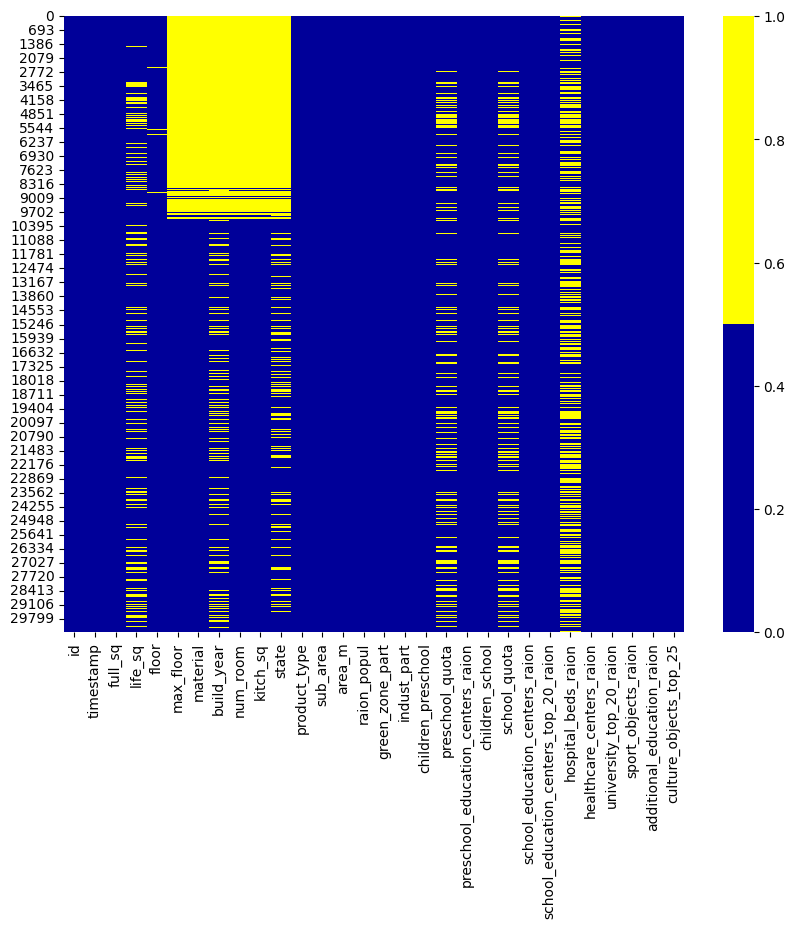

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = train.columns[:30]#uses data from index 1-30
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(train[cols].isna(), cmap=sns.color_palette(colours))

<Axes: >

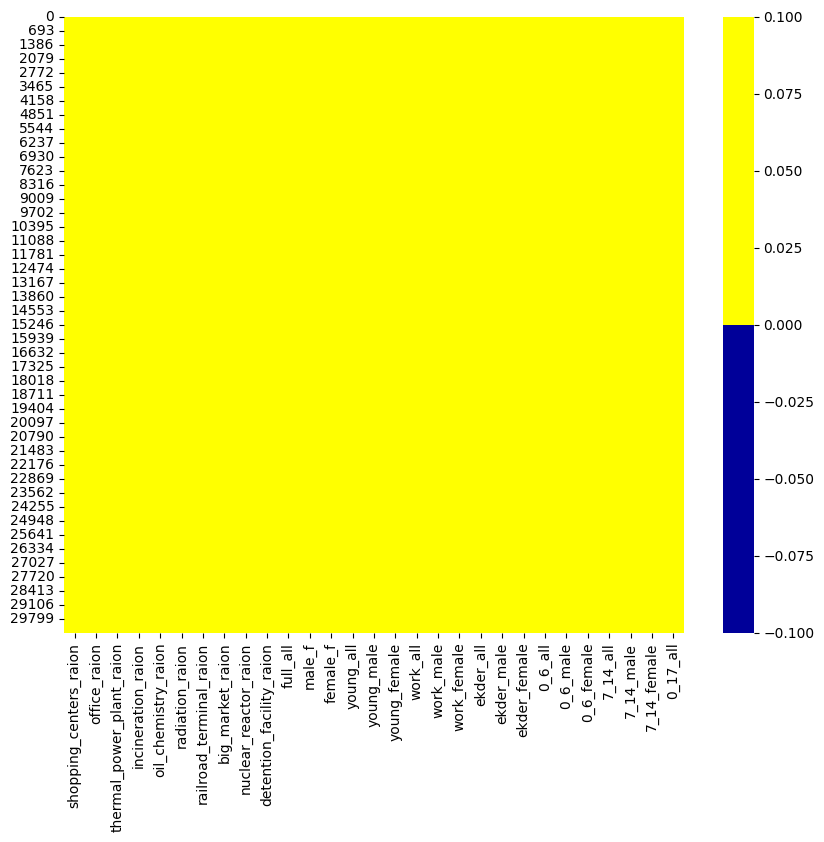

In [13]:
plt.figure(figsize=(10,8))

cols = train.columns[31:60]#uses data from index 31-60
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(train[cols].isna(), cmap=sns.color_palette(colours))

<Axes: >

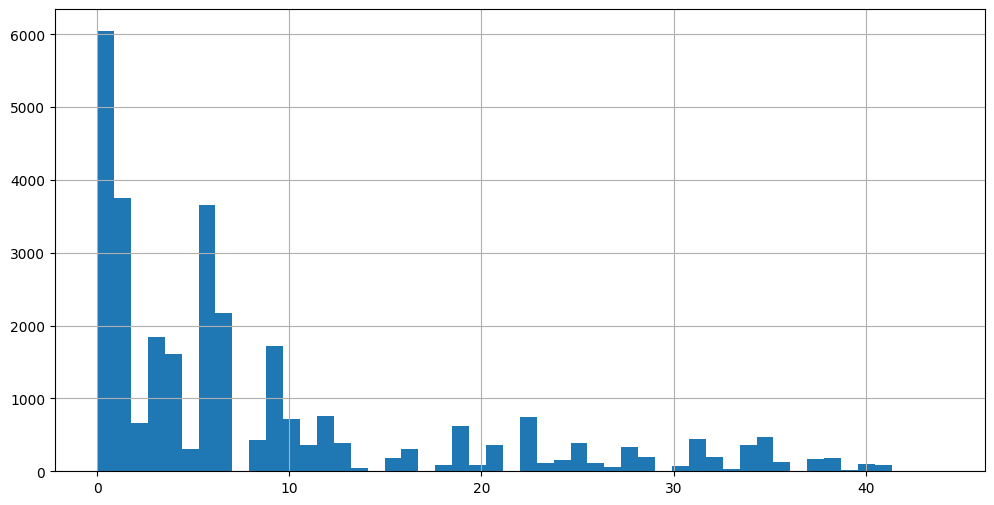

In [14]:
# Method #3: missing data (by rows) histogram
plt.figure(figsize=(12,6))
missing_by_row = train.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

# DATA CLEANING

Technique #1: drop columns / features

In [15]:
#Identifying the numeric data with more than 30% missing values
pct_missing = train.isna().mean()*100
pct_missing[pct_missing > 30]

max_floor                     31.413475
material                      31.413475
build_year                    44.649011
num_room                      31.413475
kitch_sq                      31.413475
state                         44.498047
hospital_beds_raion           47.392603
cafe_sum_500_min_price_avg    43.585704
cafe_sum_500_max_price_avg    43.585704
cafe_avg_price_500            43.585704
dtype: float64

# Technique #2: drop rows / observations

In [16]:
#train.dropna(axis='index', thresh=292-35+1).shape
#same as the code above
train_less_missing_rows = train[missing_by_row < 35].copy()
train_less_missing_rows.shape

(29302, 292)

# Technique #3: impute the missing with constant values

In [17]:
train_copy = train.copy()
train_copy[quantitative_variables] = train_copy[quantitative_variables].fillna(-999)
train_copy[qualitative_variables] = train_copy[qualitative_variables].fillna('MISSING')
train_copy.head(10)# displaying the first ten rows

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,19,13,0,10,20,1,3,67,1,2000000


# Technique #4: impute the missing with statistics

In [18]:
# We can impute the numeric columns with their respective medians.

train_copy = train.copy()
med = train_copy[quantitative_variables].median()
train_copy[quantitative_variables] = train_copy[quantitative_variables].fillna(med)
print(train_copy)# displaying the whole rows

          id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0          1  2011-08-20       43     27.0    4.0       12.0       1.0   
1          2  2011-08-23       34     19.0    3.0       12.0       1.0   
2          3  2011-08-27       43     29.0    2.0       12.0       1.0   
3          4  2011-09-01       89     50.0    9.0       12.0       1.0   
4          5  2011-09-05       77     77.0    4.0       12.0       1.0   
...      ...         ...      ...      ...    ...        ...       ...   
30466  30469  2015-06-30       44     27.0    7.0        9.0       1.0   
30467  30470  2015-06-30       86     59.0    3.0        9.0       2.0   
30468  30471  2015-06-30       45     30.0   10.0       20.0       1.0   
30469  30472  2015-06-30       64     32.0    5.0       15.0       1.0   
30470  30473  2015-06-30       43     28.0    1.0        9.0       1.0   

       build_year  num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0          1979.0       2.0       6.0

In [19]:
# We can also impute the non-numeric columns with their most frequent values.

most_freq = train_copy[qualitative_variables].describe().loc['top']
train_copy[qualitative_variables] = train_copy[qualitative_variables].fillna(most_freq)
#most_freq.head(10)# displaying the first ten rows
print(most_freq)# displaying the whole rows

timestamp                             2014-12-16
product_type                          Investment
sub_area                     Poselenie Sosenskoe
culture_objects_top_25                        no
thermal_power_plant_raion                     no
incineration_raion                            no
oil_chemistry_raion                           no
radiation_raion                               no
railroad_terminal_raion                       no
big_market_raion                              no
nuclear_reactor_raion                         no
detention_facility_raion                      no
water_1line                                   no
big_road1_1line                               no
railroad_1line                                no
ecology                                     poor
Name: top, dtype: object


In [20]:
print(train_copy)# displaying the whole rows

          id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0          1  2011-08-20       43     27.0    4.0       12.0       1.0   
1          2  2011-08-23       34     19.0    3.0       12.0       1.0   
2          3  2011-08-27       43     29.0    2.0       12.0       1.0   
3          4  2011-09-01       89     50.0    9.0       12.0       1.0   
4          5  2011-09-05       77     77.0    4.0       12.0       1.0   
...      ...         ...      ...      ...    ...        ...       ...   
30466  30469  2015-06-30       44     27.0    7.0        9.0       1.0   
30467  30470  2015-06-30       86     59.0    3.0        9.0       2.0   
30468  30471  2015-06-30       45     30.0   10.0       20.0       1.0   
30469  30472  2015-06-30       64     32.0    5.0       15.0       1.0   
30470  30473  2015-06-30       43     28.0    1.0        9.0       1.0   

       build_year  num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0          1979.0       2.0       6.0

Text(0, 0.5, 'count')

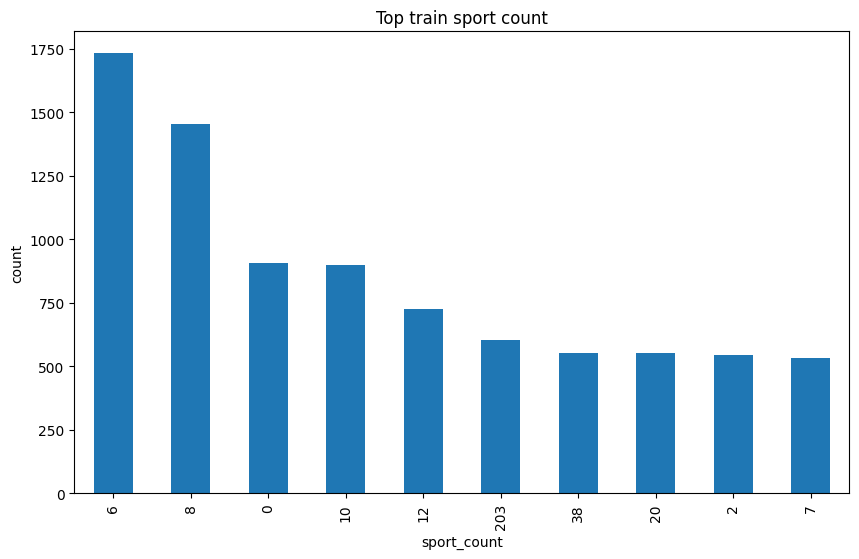

In [21]:
plt.figure(figsize=(10,6))
ax=train["sport_count_5000"].value_counts()\
.head(10)\
.plot(kind="bar", title="Top train sport count")
ax.set_xlabel("sport_count")
ax.set_ylabel("count")

Text(0, 0.5, 'count')

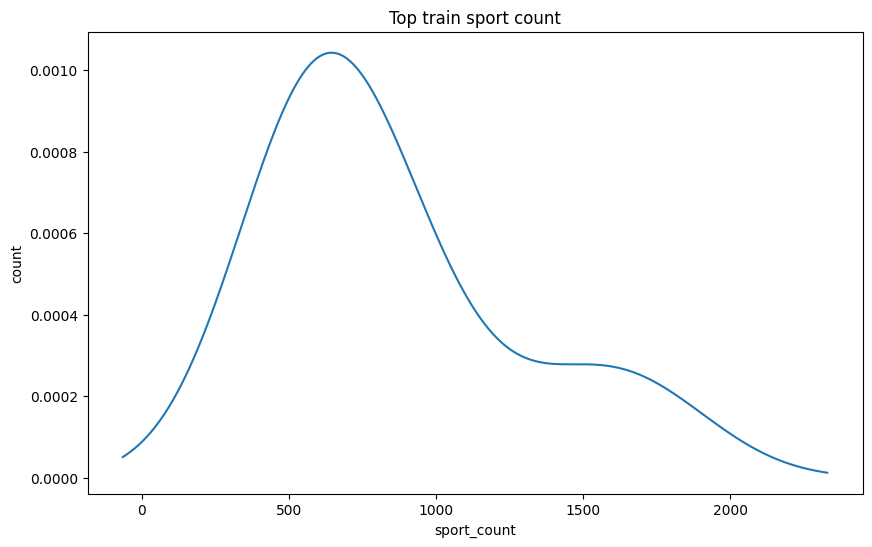

In [22]:
plt.figure(figsize=(10,6))
ax=train["sport_count_5000"].value_counts()\
.head(10)\
.plot(kind="kde", title="Top train sport count")
ax.set_xlabel("sport_count")
ax.set_ylabel("count")

Text(0.5, 0, 'price')

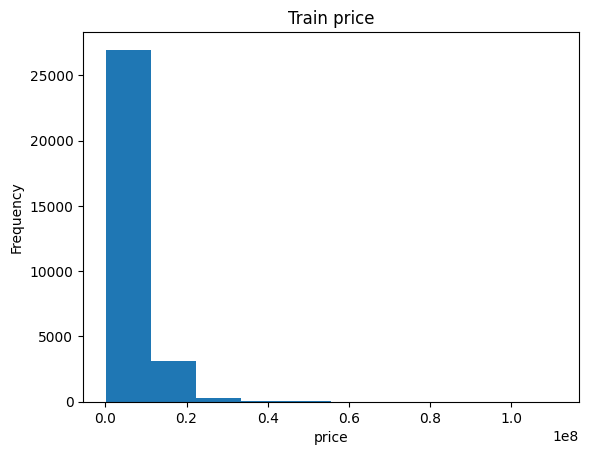

In [23]:
ax=train["price_doc"].plot(kind="hist", bins=10, title="Train price")
ax.set_xlabel("price")

Text(0.5, 0, 'price')

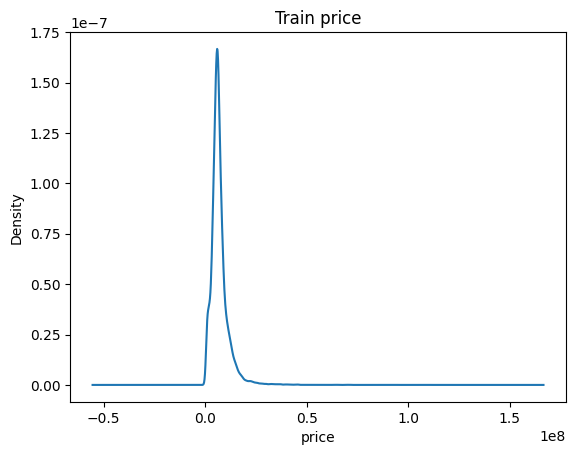

In [24]:
ax=train["price_doc"].plot(kind="kde", title="Train price")
ax.set_xlabel("price")

# Price vs price_high graph using matplotlib

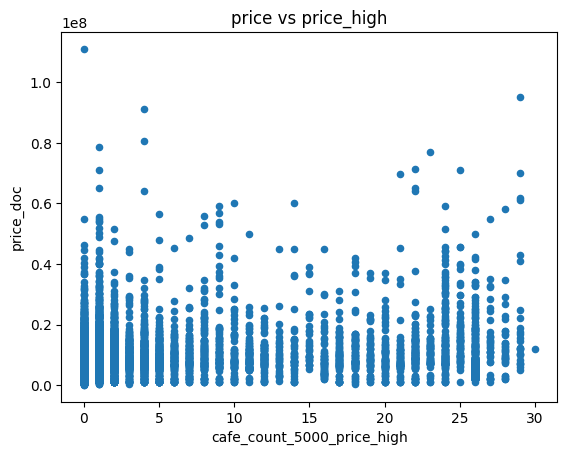

In [25]:
train.plot(kind="scatter",
           x="cafe_count_5000_price_high",
           y="price_doc",
           title="price vs price_high")
plt.show()

# Price vs price_high graph using seaborn

<Axes: xlabel='cafe_count_5000_price_high', ylabel='price_doc'>

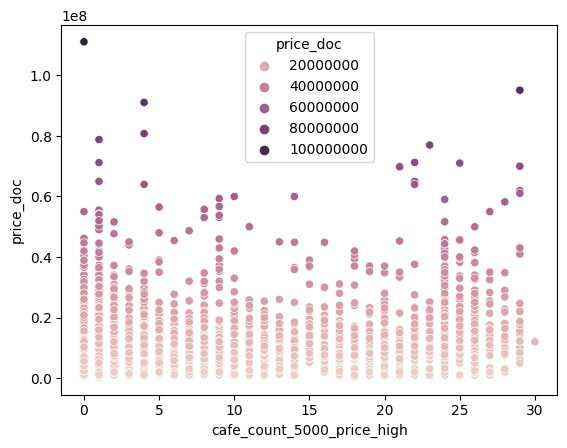

In [26]:
sns.scatterplot(x="cafe_count_5000_price_high",
                y="price_doc",
                hue="price_doc",
                data=train)

# The correlations

In [27]:
train[["sport_count_5000", "price_doc", "cafe_count_5000_price_high", "build_year"]].dropna().corr()

,sport_count_5000,price_doc,cafe_count_5000_price_high,build_year
sport_count_5000,1.000000,0.296405,0.739531,0.005978
price_doc,0.296405,1.000000,0.251778,0.002161
cafe_count_5000_price_high,0.739531,0.251778,1.000000,0.000214
build_year,0.005978,0.002161,0.000214,1.000000


<Axes: >

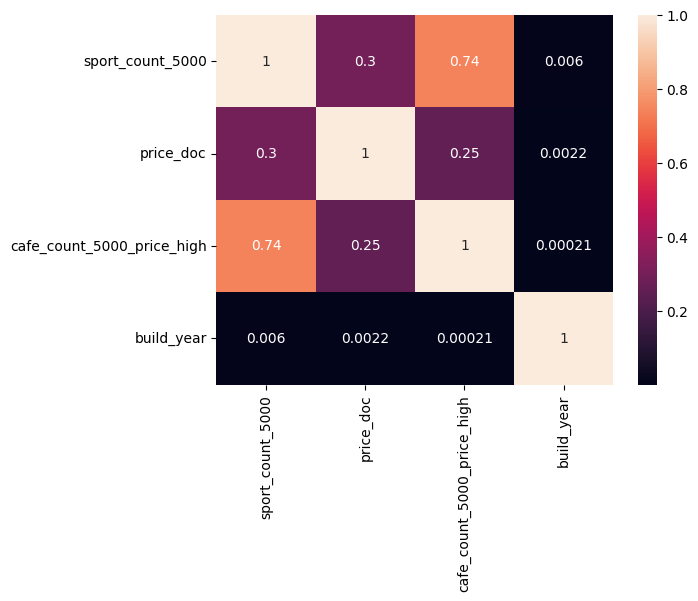

In [28]:
train_corr=train[["sport_count_5000", "price_doc", "cafe_count_5000_price_high", "build_year"]].dropna().corr()
sns.heatmap(train_corr, annot=True)